In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
# Load the data
file_path = "../data/nhanes_1720.csv"
data = pd.read_csv(file_path)
data

,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL
0,5.0,0.0,10.0,5.0,10.0,5.0,15.0,5.0,0.0,-5.0,5.0,0.0,5.0,15.0
1,15.0,10.0,10.0,5.0,0.0,15.0,-5.0,10.0,15.0,5.0,5.0,5.0,0.0,0.0
2,20.0,25.0,5.0,5.0,10.0,10.0,10.0,25.0,20.0,5.0,5.0,10.0,10.0,20.0
3,5.0,0.0,0.0,5.0,0.0,10.0,15.0,5.0,5.0,-5.0,5.0,-5.0,0.0,15.0
4,5.0,0.0,10.0,10.0,15.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,888.0,5.0,5.0,888.0,0.0,888.0,0.0,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
5143,25.0,30.0,40.0,35.0,55.0,70.0,666.0,20.0,40.0,45.0,45.0,60.0,85.0,666.0
5144,30.0,20.0,5.0,25.0,15.0,30.0,45.0,35.0,30.0,15.0,30.0,25.0,55.0,60.0
5145,888.0,5.0,5.0,888.0,0.0,888.0,30.0,888.0,5.0,10.0,888.0,10.0,888.0,15.0


In [62]:
print(data.head())

   AUXU500R  AUXU1K1R  AUXU2KR  AUXU3KR  AUXU4KR  AUXU6KR  AUXU8KR  AUXU500L  \
0       5.0       0.0     10.0      5.0     10.0      5.0     15.0       5.0   
1      15.0      10.0     10.0      5.0      0.0     15.0     -5.0      10.0   
2      20.0      25.0      5.0      5.0     10.0     10.0     10.0      25.0   
3       5.0       0.0      0.0      5.0      0.0     10.0     15.0       5.0   
4       5.0       0.0     10.0     10.0     15.0      5.0      0.0       5.0   

   AUXU1K1L  AUXU2KL  AUXU3KL  AUXU4KL  AUXU6KL  AUXU8KL  
0       0.0     -5.0      5.0      0.0      5.0     15.0  
1      15.0      5.0      5.0      5.0      0.0      0.0  
2      20.0      5.0      5.0     10.0     10.0     20.0  
3       5.0     -5.0      5.0     -5.0      0.0     15.0  
4       0.0      0.0      5.0      5.0      5.0      5.0  


In [71]:
desired_order = [
    'AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR',  # Right Ear
    'AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL'   # Left Ear
]

# # Reorder the columns
# data = data[desired_order]

# # Inspect the reordered columns
# print("Reordered Columns:")
# print(data.columns)

# # Save the reordered dataset
# output_file_path = "NHANES/reordered_hearing_data.csv"
# data.to_csv(output_file_path, index=False)

In [64]:
print(data.head())

   AUXU500R  AUXU1K1R  AUXU2KR  AUXU3KR  AUXU4KR  AUXU6KR  AUXU8KR  AUXU500L  \
0       5.0       0.0     10.0      5.0     10.0      5.0     15.0       5.0   
1      15.0      10.0     10.0      5.0      0.0     15.0     -5.0      10.0   
2      20.0      25.0      5.0      5.0     10.0     10.0     10.0      25.0   
3       5.0       0.0      0.0      5.0      0.0     10.0     15.0       5.0   
4       5.0       0.0     10.0     10.0     15.0      5.0      0.0       5.0   

   AUXU1K1L  AUXU2KL  AUXU3KL  AUXU4KL  AUXU6KL  AUXU8KL  
0       0.0     -5.0      5.0      0.0      5.0     15.0  
1      15.0      5.0      5.0      5.0      0.0      0.0  
2      20.0      5.0      5.0     10.0     10.0     20.0  
3       5.0     -5.0      5.0     -5.0      0.0     15.0  
4       0.0      0.0      5.0      5.0      5.0      5.0  


In [80]:
# Missing Data dropped for now
data.replace({666: None, 888: None, '.': None}, inplace=True)

# Drop rows where any column has missing data
cleaned_data = data.dropna()

print(f"The number of remaining rows is: {cleaned_data.shape[0]}")

The number of remaining rows is: 3837


In [82]:
# Separate the dataset into left and right ear data

# Right ear data
right_ear_data = cleaned_data[
    ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
]

# Left ear data
left_ear_data = cleaned_data[
    ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
]

# Standardize the data
scaler = StandardScaler()
standardized_right_ear_data = scaler.fit_transform(right_ear_data)
standardized_left_ear_data = scaler.fit_transform(left_ear_data)

In [66]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cleaned_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
cleaned_data['Cluster'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_15707/692382317.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = kmeans.labels_


In [72]:
# Analyze the cluster distribution
cluster_counts = cleaned_data['Cluster'].value_counts()
print(f"Cluster distribution:\n{cluster_counts}\n")

# Analyze the cluster centroids (mean values for each cluster, exclude 'Cluster' column)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=desired_order)
print(f"Cluster centroids (mean dB levels for each frequency):\n{centroid_df}\n")

Cluster distribution:
Cluster
2    1976
0     981
1     558
3     322
Name: count, dtype: int64

Cluster centroids (mean dB levels for each frequency):
    AUXU500R   AUXU1K1R    AUXU2KR    AUXU3KR    AUXU4KR    AUXU6KR  \
0  12.645260   9.796126   9.872579  11.335372  10.356779  13.149847   
1  16.048387  17.043011  23.808244  32.087814  38.369176  45.232975   
2   4.170040   2.117915   2.710020   3.064271   2.687247   5.407389   
3  30.822981  35.667702  47.965839  55.326087  60.698758  64.580745   

     AUXU8KR   AUXU500L   AUXU1K1L    AUXU2KL    AUXU3KL    AUXU4KL  \
0  12.354740  12.813456  10.152905  10.805301  12.502548  11.630989   
1  53.745520  16.326165  17.930108  26.129032  34.865591  40.940860   
2   3.165486   4.557186   2.722672   3.532389   3.752530   3.345142   
3  69.130435  30.822981  35.978261  49.968944  56.972050  61.878882   

     AUXU6KL    AUXU8KL  
0  13.822630  13.853211  
1  46.657706  55.707885  
2   5.617409   3.970142  
3  64.472050  70.201863  



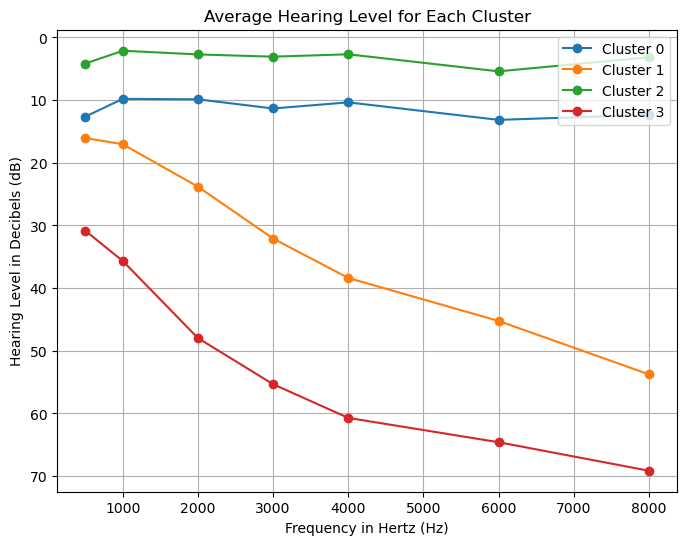

In [73]:
# Correct frequency values (500 Hz to 8000 Hz)
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]

# Plot the cluster centroids
plt.figure(figsize=(8, 6))

for i in range(4):
    plt.plot(frequencies, centroid_df.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_15707/347323186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster_3'] = kmeans_3.labels_


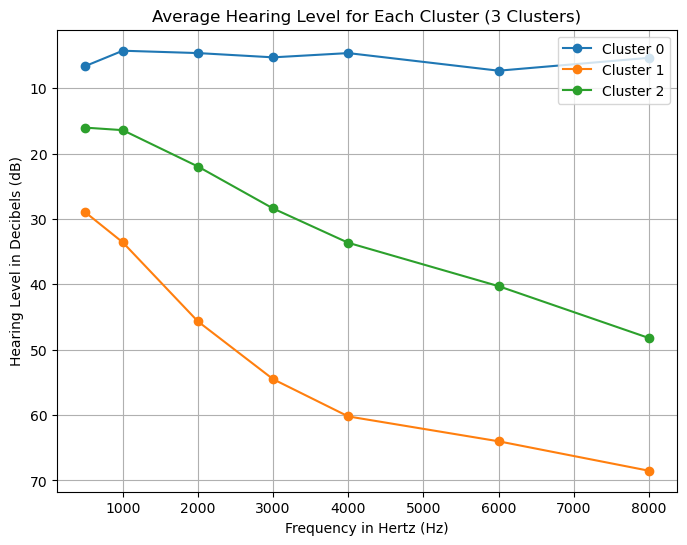

In [74]:
# Apply KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(data_scaled)

# Add the new cluster labels to the cleaned data
cleaned_data['Cluster_3'] = kmeans_3.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids_3 = scaler.inverse_transform(kmeans_3.cluster_centers_)
centroid_df_3 = pd.DataFrame(centroids_3, columns=desired_order)

# Plot the cluster centroids with 3 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(frequencies, centroid_df_3.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (3 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_15707/157581304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster_2'] = kmeans_2.labels_


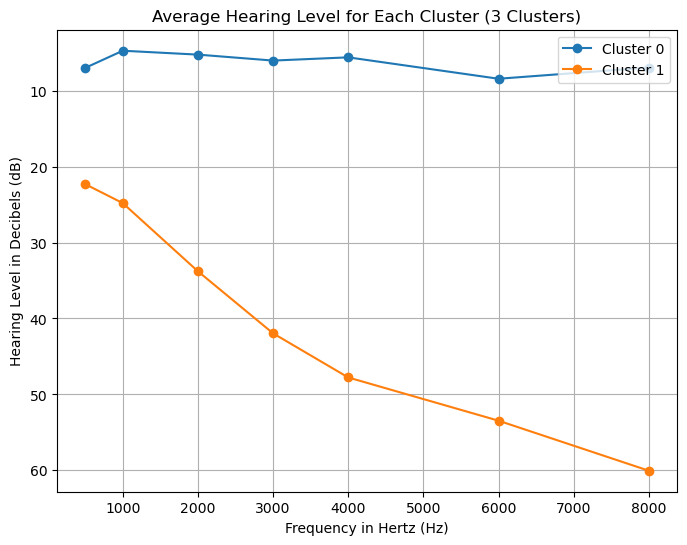

In [75]:
# Apply KMeans clustering with 3 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(data_scaled)

# Add the new cluster labels to the cleaned data
cleaned_data['Cluster_2'] = kmeans_2.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids_2 = scaler.inverse_transform(kmeans_2.cluster_centers_)
centroid_df_2 = pd.DataFrame(centroids_2, columns=desired_order)

# Plot the cluster centroids with 3 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(2):
    plt.plot(frequencies, centroid_df_2.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (3 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_15707/2200635150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster_5'] = kmeans_5.labels_


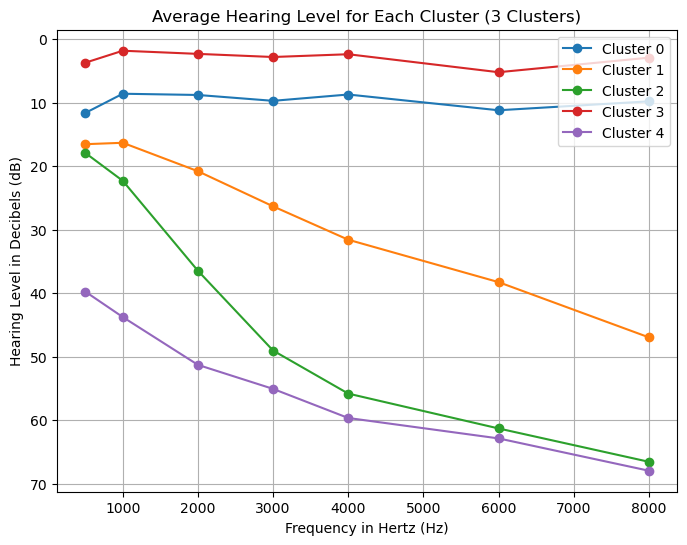

In [76]:
# Apply KMeans clustering with 3 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(data_scaled)

# Add the new cluster labels to the cleaned data
cleaned_data['Cluster_5'] = kmeans_5.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids_5 = scaler.inverse_transform(kmeans_5.cluster_centers_)
centroid_df_5 = pd.DataFrame(centroids_5, columns=desired_order)

# Plot the cluster centroids with 3 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(5):
    plt.plot(frequencies, centroid_df_5.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (3 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

# Use Elbow Method and Silhouette for Finding the "Best" K

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=1, Inertia=53718.0
K=2, Inertia=21049.52148982094
K=3, Inertia=16675.176534746177
K=4, Inertia=14653.215649930582


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5, Inertia=13267.759431868019
K=6, Inertia=12411.041761938943
K=7, Inertia=11755.492576749391
K=8, Inertia=11238.723059920358


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=9, Inertia=10873.43141006969
K=10, Inertia=10564.642493850464


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


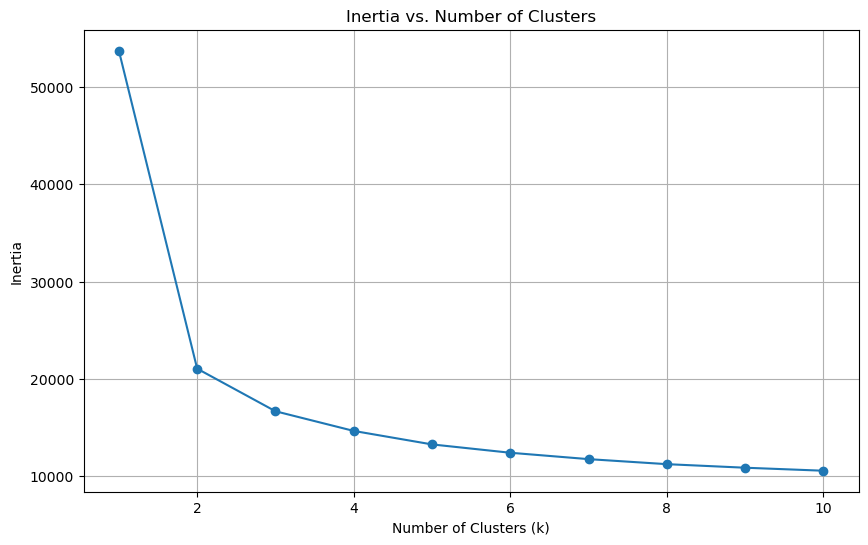

In [77]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_}")

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2, Silhouette Score=0.6083706459938224
K=3, Silhouette Score=0.5071596528826207


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4, Silhouette Score=0.2509431844609564
K=5, Silhouette Score=0.21479328502690453


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6, Silhouette Score=0.21665969903044094


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=7, Silhouette Score=0.18316429270627937


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8, Silhouette Score=0.1397665240774263
K=9, Silhouette Score=0.13744736111572933


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10, Silhouette Score=0.12303158791001748


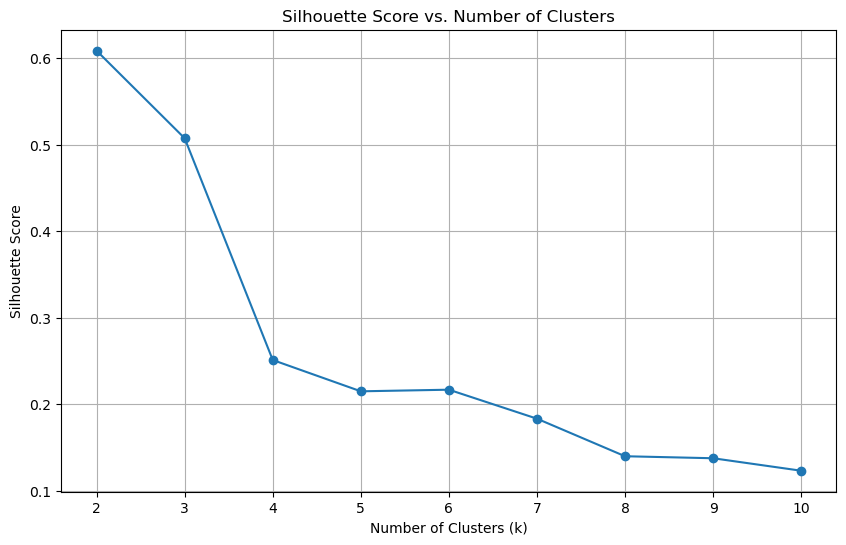

In [78]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    # Calculate the silhouette score
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Experiment with Left Ear Only

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=1, Inertia=26859.0
K=2, Inertia=10003.105495663973
K=3, Inertia=7745.321778701356
K=4, Inertia=6484.332608437894


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5, Inertia=5713.763341096271
K=6, Inertia=5300.517921053237
K=7, Inertia=4966.692801128161


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8, Inertia=4670.598015368607
K=9, Inertia=4455.603183912906
K=10, Inertia=4278.555090670612


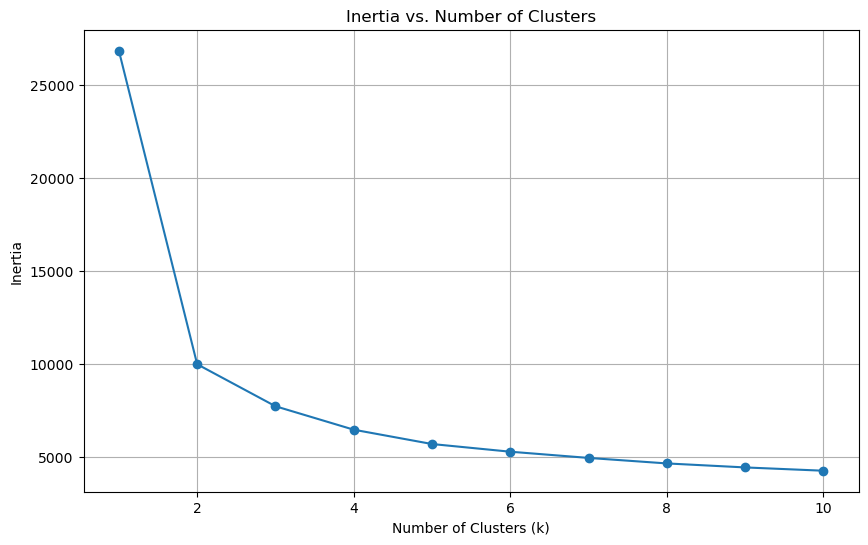

In [83]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_left_ear_data)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_}")

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2, Silhouette Score=0.6256041606778499
K=3, Silhouette Score=0.5279399779065158


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4, Silhouette Score=0.3143791816948068
K=5, Silhouette Score=0.25049874126499677


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6, Silhouette Score=0.25236858864822564
K=7, Silhouette Score=0.1842741523743191


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8, Silhouette Score=0.1849379137609142
K=9, Silhouette Score=0.1680567533961646


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10, Silhouette Score=0.16355270042005657


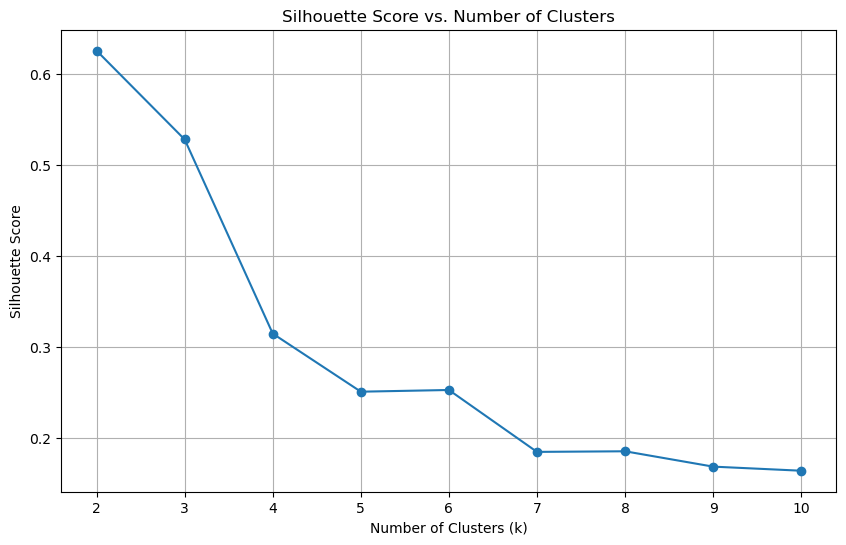

In [84]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_left_ear_data)
    # Calculate the silhouette score
    score = silhouette_score(standardized_left_ear_data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Experiment with Right Ear Only

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=1, Inertia=26859.0
K=2, Inertia=10162.414184725469
K=3, Inertia=7778.395437337279
K=4, Inertia=6670.321743447936


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5, Inertia=5891.693217933666
K=6, Inertia=5406.7100492426525
K=7, Inertia=5047.202301794333
K=8, Inertia=4769.246187647208


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=9, Inertia=4568.001276320936
K=10, Inertia=4387.298766841732


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


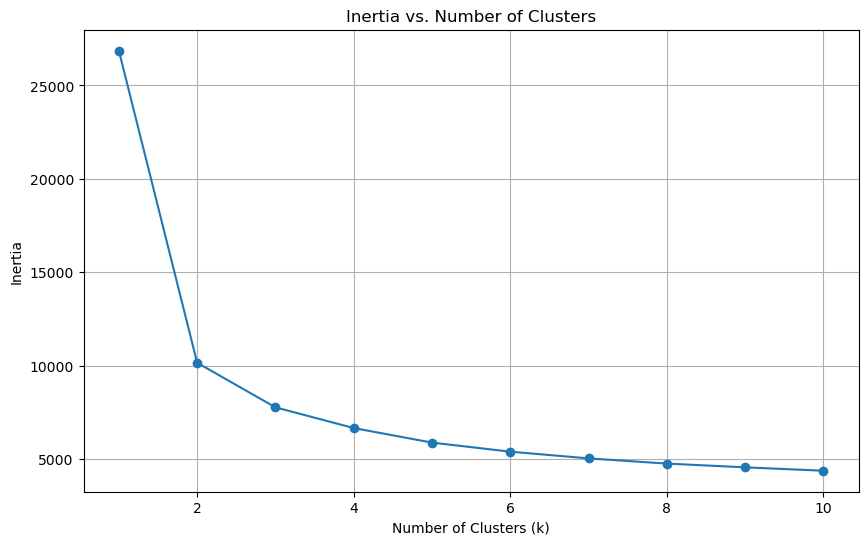

In [85]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_right_ear_data)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_}")

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2, Silhouette Score=0.6200866674803974
K=3, Silhouette Score=0.511842539089845


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4, Silhouette Score=0.29174088479279364
K=5, Silhouette Score=0.2520711947087645


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6, Silhouette Score=0.2442409893589329


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=7, Silhouette Score=0.1918610761243313
K=8, Silhouette Score=0.17987711689745342


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=9, Silhouette Score=0.16538908757625007
K=10, Silhouette Score=0.16360215199672118


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


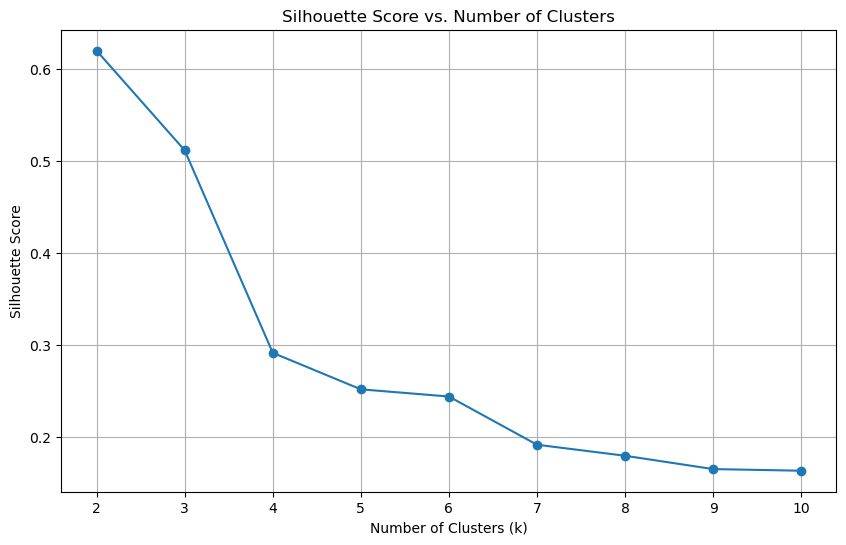

In [86]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_right_ear_data)
    # Calculate the silhouette score
    score = silhouette_score(standardized_right_ear_data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [116]:
# Inertia value comparison
print(14653.215649930582 / 14)
print(6484.332608437894 / 7)
print(6670.321743447936 / 7)

1046.6582607093274
926.333229776842
952.903106206848


# Weighted Average

In [152]:
# Define weights for left and right ear data
weights = [0.8, 1.1]

# Calculate the weighted average hearing level
weighted_average_hearing = (weights[0] * np.array(left_ear_data) + weights[1] * np.array(right_ear_data)) / sum(weights)

# Convert the weighted average hearing level to a DataFrame
weighted_average_hearing = pd.DataFrame(weighted_average_hearing, columns=frequencies)

weighted_average_hearing.head()

,500,1000,2000,3000,4000,6000,8000
0,5.0,0.0,3.684211,5.0,5.789474,5.0,15.0
1,12.894737,12.105263,7.894737,5.0,2.105263,8.684211,-2.894737
2,22.105263,22.894737,5.0,5.0,10.0,10.0,14.210526
3,5.0,2.105263,-2.105263,5.0,-2.105263,5.789474,15.0
4,5.0,0.0,5.789474,7.894737,10.789474,5.0,2.105263


In [153]:
# Fit KMenas to the weighted average hearing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(weighted_average_hearing)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


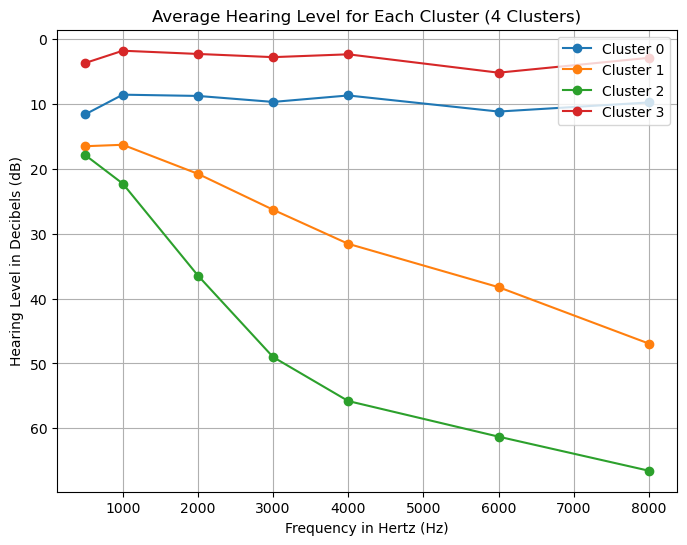

In [154]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
weighted_average_hearing['Cluster'] = kmeans.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=desired_order[:7])

# Plot the cluster centroids with 4 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(4):
    plt.plot(frequencies, centroid_df_5.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (4 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

K=1, Inertia=3836.999999999999
K=2, Inertia=1331.4866818206408
K=3, Inertia=989.9302085481055
K=4, Inertia=830.7305692574838
K=5, Inertia=722.717290078114
K=6, Inertia=655.58616058065
K=7, Inertia=605.0450653523845


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8, Inertia=564.7005996390452
K=9, Inertia=535.732110081441
K=10, Inertia=511.0268478970783


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


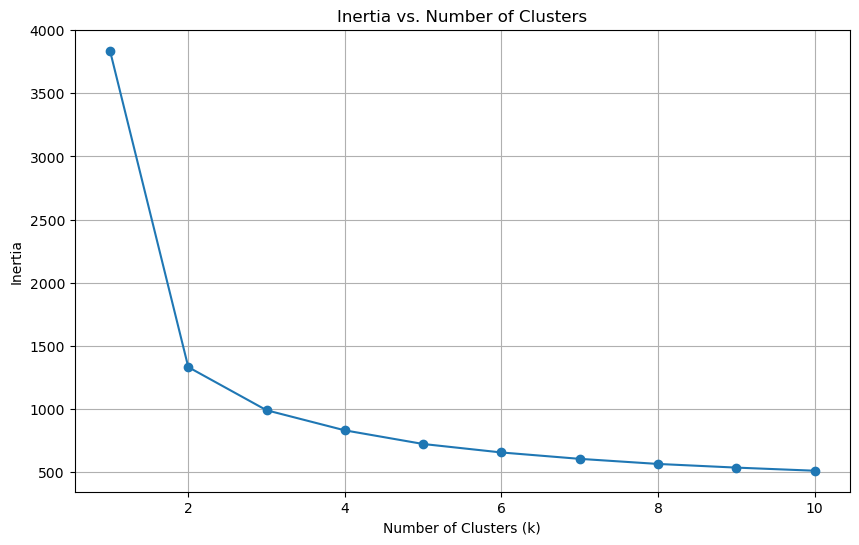

In [155]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_/7)
    print(f"K={k}, Inertia={kmeans.inertia_/7}")

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2, Silhouette Score=0.643351989534181
K=3, Silhouette Score=0.5489544853232338


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4, Silhouette Score=0.3055433033103493
K=5, Silhouette Score=0.272669458236685


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6, Silhouette Score=0.276639944705166


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=7, Silhouette Score=0.24648653395719766


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8, Silhouette Score=0.19738157590855643
K=9, Silhouette Score=0.19813209283736363


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10, Silhouette Score=0.18484786391436392


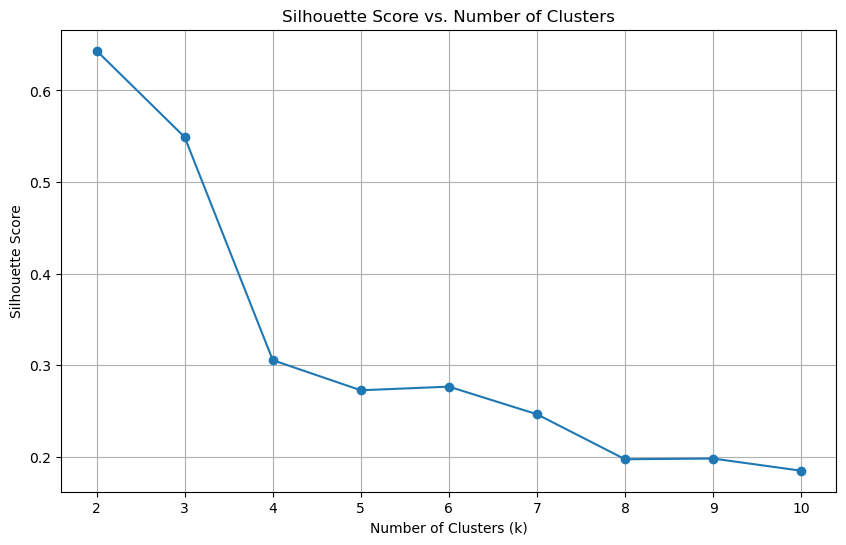

In [156]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    # Calculate the silhouette score
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [161]:
# Grid Search for optimal weights for left and right ear data

# Define a range of weights to try
left_weights = np.linspace(0.1, 2.0, 20)
right_weights = np.linspace(0.1, 2.0, 20)

# Initialize variables to store the best weights and silhouette score
best_left_weight = 0
best_right_weight = 0
best_silhouette = -1

# Iterate over all combinations of weights
for left_weight in left_weights:
    for right_weight in right_weights:
        if right_weight > left_weight:
            continue
        else:
            # Calculate the weighted average hearing level
            weighted_average_hearing = (left_weight * np.array(left_ear_data) + right_weight * np.array(right_ear_data)) / (left_weight + right_weight)
            # Convert the weighted average hearing level to a DataFrame
            weighted_average_hearing = pd.DataFrame(weighted_average_hearing, columns=frequencies)
            # Standardize the data
            data_scaled = scaler.fit_transform(weighted_average_hearing)
            # Perform KMeans clustering
            kmeans = KMeans(n_clusters=4, random_state=42)
            kmeans.fit(data_scaled)
            # Calculate the silhouette score
            score = silhouette_score(data_scaled, kmeans.labels_)
            # Update the best weights and silhouette score if the current score is higher
            if score > best_silhouette:
                best_silhouette = score
                best_left_weight = left_weight
                best_right_weight = right_weight
            # print(f"Left Weight={left_weight:.2f}, Right Weight={right_weight:.2f}, Silhouette Score={score:.4f}")

# Print the best weights and silhouette score
print(f"Best Weights: Left={best_left_weight:.2f}, Right={best_right_weight:.2f}, Silhouette Score={best_silhouette:.4f}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Best Weights: Left=1.90, Right=0.70, Silhouette Score=0.3514


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
